In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from collections import Counter
import seaborn as sns
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
data = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/DataClustering.csv") #Read the dataframe from the .csv file and store it as a dataframe
data.head() # To visualize how many features are present in the given data

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


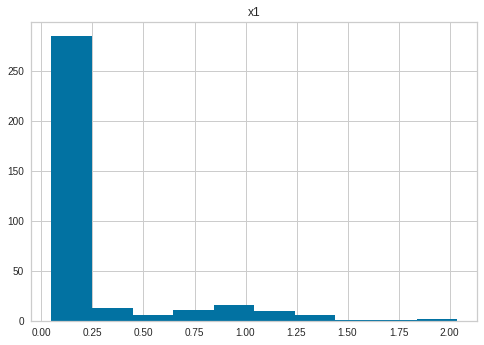

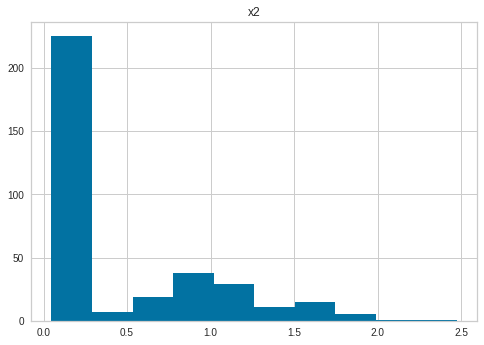

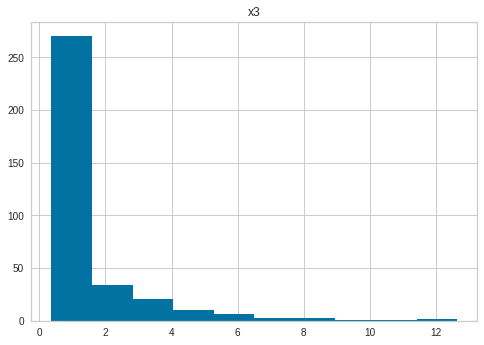

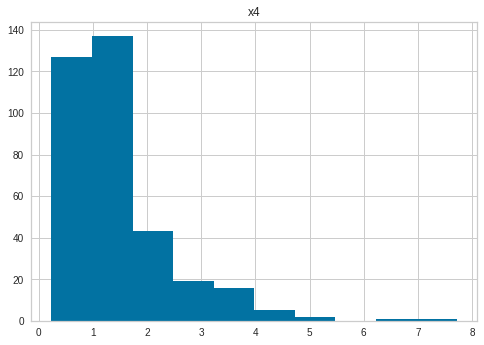

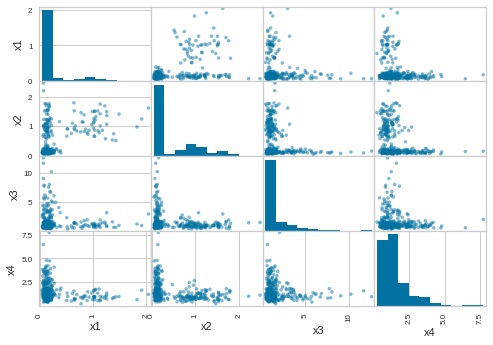

In [ ]:
'''
Question 2(a)
References: https://mode.com/example-gallery/python_histogram/
https://www.geeksforgeeks.org/pair-plots-using-scatter-matrix-in-pandas/
'''
# We plot histograms separately for variables x1,x2,x3 and x4
data.hist(column='x1')
data.hist(column='x2')
data.hist(column='x3')
data.hist(column='x4')
# We plot the pair wise scatter plots in order to visualize the features
features = ['x1','x2','x3','x4']
# Plotting the scatter matrix with the features
scatter_matrix(data[features])
plt.show()

**Observations based on data visualization:**

1) Most of the values of feature x1 and x2 lie between 0.0 to 0.25.

2) Most of the values of feature x3 lie between 0.0 to 1.0

3) Most of the values of feature x4 lie between 0.0 to 2.5

A good way to understand the correlation among the features, is to create scatter plots for each pair of attributes. From the scatter plot we can observe that there is no clear corralation (either positive or negative) between the different variables used here.

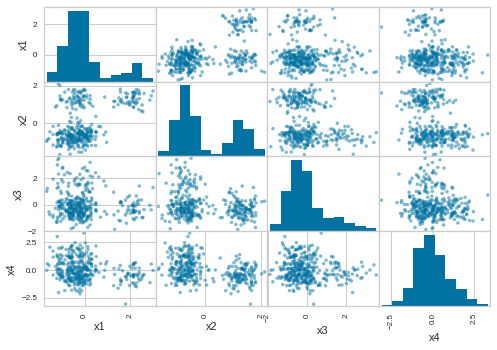

In [ ]:
'''
Question 2(a)
'''
# Here we apply log transformation to all the  and plot the scatter plot again
data_trans = data # data_trans is a copy of original data variable
for i in [data.columns]:
  data_trans[i] = np.log(data_trans[i]) # Apply log transform to all variables
data_trans = (data_trans-data_trans.mean())/data_trans.std()  # Normalizing the log transformed data
# Plotting the scatter matrix with the features
scatter_matrix(data_trans[data_trans.columns]) 
plt.show()

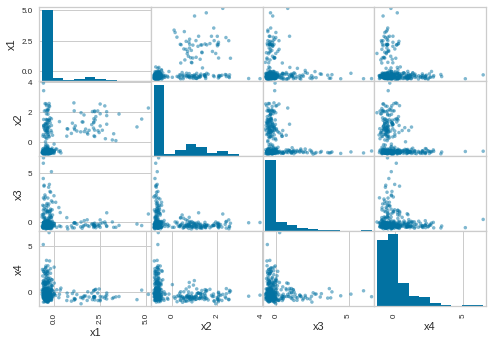

In [ ]:
'''
Question 2(a)
'''
# Here we apply exponential transformation to all the features and plot the scatter plot again
data_trans2 = data # data_trans is a copy of original data variable
for i in [data.columns]:
  data_trans2[i] = np.exp(data_trans2[i]) # Apply log transform to all variables
data_trans2 = (data_trans2-data_trans2.mean())/data_trans2.std()  # Normalizing the exponential transformed data  
# Plotting the scatter matrix with the features
scatter_matrix(data_trans2[data_trans2.columns])
plt.show()

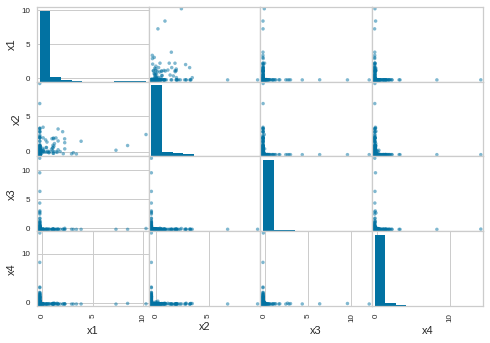

In [ ]:
'''
Question 2(a)
'''
# Here we apply power transformation to all the features and plot the scatter plot again
data_trans3 = data # data_trans is a copy of original data variable
for i in [data.columns]:
  data_trans3[i] = np.power(data_trans3[i],3) # Apply log transform to all variables
data_trans3 = (data_trans3-data_trans3.mean())/data_trans3.std()  # Normalizing the power transformed data
# Plotting the scatter matrix with the features
scatter_matrix(data_trans3[data_trans3.columns])
plt.show()

**Observations after applying transformations:**

1) Only after applying log transformation we can observe that there are pair wise clusters in the scatter plot.

2) After applying exponential and power transformation there is no effect seen in the scatter plots looking at which we can not conclude any correlation between the features/variables.

3) Based on the above two observations we will apply log transformation to our data and then apply clustering.

4) We have normalized the data after applying the transforms.

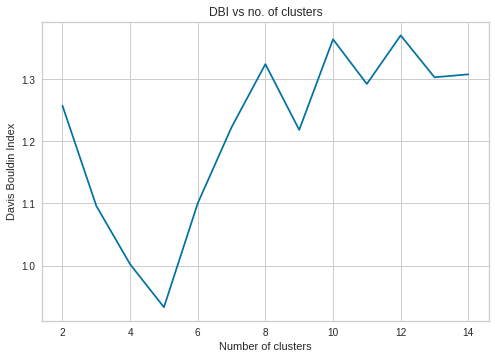

In [ ]:

'''
Question 2(b)
References: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
Within cluster sum of squares (WCSS): In order to determine the right number of clusters we use the elbow method we plot the WCSS vs number of clusters and based on the plot select the optimum number of clusters.
We select the number of clusters where the change in WCSS begins to level off (elbow method).
WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.
'''

# Here onwards we will use data_trans as the dataframe since it contains the log transformed data.
wcss = []
dbs = []
max_clusters = 15 # Plot the graph for 15 clusters
for i in range(2,max_clusters):
  kmeans = KMeans(n_clusters=i,init='k-means++', max_iter=500)
  kmeans.fit(data_trans)
  labels = kmeans.fit_predict(data_trans)
  db_index = davies_bouldin_score(data_trans, labels)
  wcss.append(kmeans.inertia_)
  dbs.append(db_index)

plt.plot(range(2,max_clusters),dbs)  # Plot the graph for elbow method
plt.title('DBI vs no. of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davis Bouldin Index')
plt.show()


**IMPORTANT NOTE:**

The **Davies Bouldin score** is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering.

When we do not know the number of clusters we have to use the methods such as Elbow method, Davies Bouldin Index method or Silhoutte method for finding the optimal number of datasets in the cluster. 

Here we are using the Davies Bouldin index to find the optimal number of clusters in the dataset. In the above figure the number of clusters K is plotted against the Davies Bouldin Score.

Based on the above curve we can observe that the minimum occurs at number of clusters = 5. Therefore, the value of number of clusters = 5 is used in further code for visualizing the data.

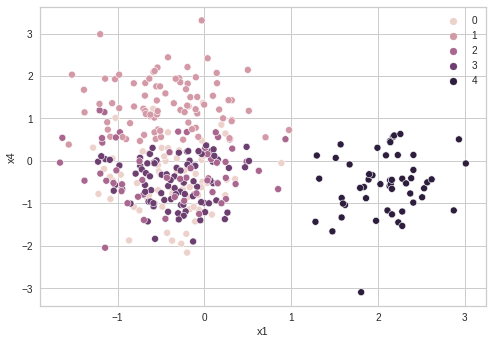

In [ ]:
'''
Question 2(c)
Reference: https://www.reneshbedre.com/blog/kmeans-clustering-python.html
Here we have tried to visualize the data in 2D
'''
kmeans = KMeans(n_clusters=5,init = 'k-means++', random_state=0).fit(data_trans)  # Fit the KMeans model for 5 clusters
kmeans.labels_  # Cluster Labels for each data point
kmeans.inertia_ # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
kmeans.cluster_centers_ # Gives the cluster centers
sns.scatterplot(data=data_trans, x="x1", y="x4", hue=kmeans.labels_)  # use seaborn to plot the scatterplot
plt.show()  # Display the data

In [ ]:
print("The number of points in each cluster are:")
Counter(kmeans.labels_) # gives the number of data samples in each cluster 

The number of points in each cluster are:


Counter({0: 68, 1: 86, 2: 55, 3: 89, 4: 53})

In [ ]:
'''
Question 2(c)
Reference: https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6
https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
In the below part of code we apply t-sne embedding on 3 dimenaions out of the 4 dimensions. We obtain the data clustured into 5 clusters. We can observe this from the 3D scatterplot given below.
The given data has been divided into 5 clusters.

T-distributed Stochastic Neighbor Embedding: t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between 
the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.
We also found out the KMeans SNE Silhouette score.
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. 
In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space.
'''

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200) # Set parameters for t-sne embedding n_components is the number of dimensions of embedded space 
# The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. A value is selected between 5 and 50 based on hit and trial
# Maximum number of iterations without progress before we abort the optimization, used after 250 initial iterations with early exaggeration. 

tsne_scale_results = tsne.fit_transform(data_trans) # Fit the model to our log transformed data
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3']) #Convert the above result after transform into a dataframe

kmeans_tsne_scale = KMeans(n_clusters=5, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)  # Use 5 clusters for K Means found in the earlier steps using elbow method/ Davvies Bouldin Index
# n_init is the number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
# 'k-means++' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean'))) # Print the silhoutte score
labels_tsne_scale = kmeans_tsne_scale.labels_ #gives cluster label to each data point
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1) # Create a dataframe useful for plotting the data

# Reference: https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6

Scene = dict(xaxis = dict(title  = 'tsne1'),yaxis = dict(title  = 'tsne2'),zaxis = dict(title  = 'tsne3'))  # Used to plot the 3D scatterplot of clusters
labels = labels_tsne_scale  
# Plots a 3D scatter-plot 
trace = go.Scatter3d(x=clusters_tsne_scale.iloc[:,0], y=clusters_tsne_scale.iloc[:,1], z=clusters_tsne_scale.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'yellow',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout) #defines the figure
fig.show() # Plots the 3D scatterplot

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 351 samples in 0.000s...
[t-SNE] Computed neighbors for 351 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 351 / 351
[t-SNE] Mean sigma: 0.994768


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.849030
[t-SNE] KL divergence after 5000 iterations: 1.453802
KMeans tSNE Scaled Silhouette Score: 0.27178603410720825


**IMPORTANT NOTE:**

1) In order to clearly view the clusters present in the above figure use the scroll button of the mouse to zoom in or zoom out from the figure.

2) Based on our current initialization, there are 78 samples from cluster 0;  77 samples from cluster 1; 63 samples from cluster 2; 65 samples from cluster 3 and 68 samples from cluster 4.